In [2]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb

In [3]:
!ls ../data/

sample_submission.csv			       test.csv
santander-customer-transaction-prediction.zip  train.csv


In [4]:
df = pd.read_csv("../data/train.csv")

In [5]:
for i,v in enumerate(df.dtypes):
    if v!=np.float64:
        print(i,v)

0 object
1 int64


In [6]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
Y = df["target"]

In [8]:
X= df.drop(["ID_code","target"],axis=1)

In [9]:
df.shape

(200000, 202)

In [10]:
y_test,y_train = Y[:20000],Y[20000:]

In [11]:
x_test,x_train = X[:20000],X[20000:]

In [12]:
x_train.shape

(180000, 200)

In [13]:
print("X shape:",X.shape)
print("Y:",set(Y))
X.head()

X shape: (200000, 200)
Y: {0, 1}


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [14]:
import matplotlib.pyplot as plt

In [15]:
# gb classifier sklearn

In [16]:
from sklearn import ensemble

In [17]:
original_params = {'n_estimators': 1000, 
                   'max_leaf_nodes': 4, 
                   'max_depth': None, 
                   'random_state': 2,
                   'min_samples_split': 5,
                   'learning_rate': 1.0, 
                   'subsample': 1.0}
params = dict(original_params)

# for label, color, setting in [('No shrinkage', 'orange',
#                                {'learning_rate': 1.0, 'subsample': 1.0}),
#                               ('learning_rate=0.1', 'turquoise',
#                                {'learning_rate': 0.1, 'subsample': 1.0}),
#                               ('subsample=0.5', 'blue',
#                                {'learning_rate': 1.0, 'subsample': 0.5}),
#                               ('learning_rate=0.1, subsample=0.5', 'gray',
#                                {'learning_rate': 0.1, 'subsample': 0.5}),
#                               ('learning_rate=0.1, max_features=2', 'magenta',
#                                {'learning_rate': 0.1, 'max_features': 2})]:
# params.update(setting)


In [17]:
clf = ensemble.GradientBoostingClassifier(**params)

In [47]:
clf.fit(x_train, y_train)

TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [24]:
test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

In [25]:
test_deviance.shape

(1000,)

In [26]:
for i, y_pred in enumerate(clf.staged_decision_function(x_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

In [18]:
import lightgbm as lgb

In [79]:
df_test = pd.read_csv("../data/test.csv")

In [81]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [19]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [22]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=800,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's l2: 0.0883545	valid_0's l1: 0.17897
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0880257	valid_0's l1: 0.178644
[3]	valid_0's l2: 0.0876829	valid_0's l1: 0.178333
[4]	valid_0's l2: 0.0874315	valid_0's l1: 0.178047
[5]	valid_0's l2: 0.0871176	valid_0's l1: 0.177712
[6]	valid_0's l2: 0.0868385	valid_0's l1: 0.177417
[7]	valid_0's l2: 0.0865815	valid_0's l1: 0.177155
[8]	valid_0's l2: 0.0863536	valid_0's l1: 0.17689
[9]	valid_0's l2: 0.0861058	valid_0's l1: 0.176626
[10]	valid_0's l2: 0.0858799	valid_0's l1: 0.176335
[11]	valid_0's l2: 0.0856245	valid_0's l1: 0.176078
[12]	valid_0's l2: 0.0853293	valid_0's l1: 0.175737
[13]	valid_0's l2: 0.0851029	valid_0's l1: 0.175489
[14]	valid_0's l2: 0.0848806	valid_0's l1: 0.175217
[15]	valid_0's l2: 0.0846564	valid_0's l1: 0.174956
[16]	valid_0's l2: 0.0844351	valid_0's l1: 0.174667
[17]	valid_0's l2: 0.0842115	valid_0's l1: 0.174374
[18]	valid_0's l2: 0.0840089	valid_0's l1: 0.174099
[19]	valid_0's

[157]	valid_0's l2: 0.0692097	valid_0's l1: 0.149951
[158]	valid_0's l2: 0.0691497	valid_0's l1: 0.149818
[159]	valid_0's l2: 0.0691069	valid_0's l1: 0.149706
[160]	valid_0's l2: 0.0690565	valid_0's l1: 0.14958
[161]	valid_0's l2: 0.0689964	valid_0's l1: 0.149459
[162]	valid_0's l2: 0.06894	valid_0's l1: 0.149345
[163]	valid_0's l2: 0.0688725	valid_0's l1: 0.149213
[164]	valid_0's l2: 0.0688224	valid_0's l1: 0.149095
[165]	valid_0's l2: 0.0687693	valid_0's l1: 0.148973
[166]	valid_0's l2: 0.0687046	valid_0's l1: 0.148866
[167]	valid_0's l2: 0.0686401	valid_0's l1: 0.148779
[168]	valid_0's l2: 0.068579	valid_0's l1: 0.148693
[169]	valid_0's l2: 0.0685292	valid_0's l1: 0.148597
[170]	valid_0's l2: 0.0684809	valid_0's l1: 0.148509
[171]	valid_0's l2: 0.068421	valid_0's l1: 0.148395
[172]	valid_0's l2: 0.0683617	valid_0's l1: 0.148272
[173]	valid_0's l2: 0.068318	valid_0's l1: 0.148159
[174]	valid_0's l2: 0.0682682	valid_0's l1: 0.148043
[175]	valid_0's l2: 0.0681991	valid_0's l1: 0.14791


[314]	valid_0's l2: 0.0632553	valid_0's l1: 0.136411
[315]	valid_0's l2: 0.0632313	valid_0's l1: 0.136348
[316]	valid_0's l2: 0.0632058	valid_0's l1: 0.136294
[317]	valid_0's l2: 0.0631852	valid_0's l1: 0.136241
[318]	valid_0's l2: 0.0631576	valid_0's l1: 0.136178
[319]	valid_0's l2: 0.063132	valid_0's l1: 0.136114
[320]	valid_0's l2: 0.0630996	valid_0's l1: 0.136043
[321]	valid_0's l2: 0.0630712	valid_0's l1: 0.135969
[322]	valid_0's l2: 0.063049	valid_0's l1: 0.135898
[323]	valid_0's l2: 0.0630069	valid_0's l1: 0.135814
[324]	valid_0's l2: 0.0629825	valid_0's l1: 0.135736
[325]	valid_0's l2: 0.0629455	valid_0's l1: 0.135649
[326]	valid_0's l2: 0.0629197	valid_0's l1: 0.135578
[327]	valid_0's l2: 0.0629057	valid_0's l1: 0.135515
[328]	valid_0's l2: 0.0628952	valid_0's l1: 0.135458
[329]	valid_0's l2: 0.0628568	valid_0's l1: 0.135379
[330]	valid_0's l2: 0.0628475	valid_0's l1: 0.135327
[331]	valid_0's l2: 0.0628309	valid_0's l1: 0.135253
[332]	valid_0's l2: 0.0628144	valid_0's l1: 0.13

[470]	valid_0's l2: 0.0604254	valid_0's l1: 0.128252
[471]	valid_0's l2: 0.0604191	valid_0's l1: 0.128214
[472]	valid_0's l2: 0.0604091	valid_0's l1: 0.128173
[473]	valid_0's l2: 0.0604024	valid_0's l1: 0.128138
[474]	valid_0's l2: 0.0604013	valid_0's l1: 0.128096
[475]	valid_0's l2: 0.0603892	valid_0's l1: 0.128044
[476]	valid_0's l2: 0.0603798	valid_0's l1: 0.127984
[477]	valid_0's l2: 0.0603703	valid_0's l1: 0.127927
[478]	valid_0's l2: 0.0603584	valid_0's l1: 0.127869
[479]	valid_0's l2: 0.0603404	valid_0's l1: 0.127814
[480]	valid_0's l2: 0.0603288	valid_0's l1: 0.127759
[481]	valid_0's l2: 0.0603016	valid_0's l1: 0.127719
[482]	valid_0's l2: 0.0602917	valid_0's l1: 0.127697
[483]	valid_0's l2: 0.0602809	valid_0's l1: 0.127671
[484]	valid_0's l2: 0.0602666	valid_0's l1: 0.12764
[485]	valid_0's l2: 0.0602458	valid_0's l1: 0.127602
[486]	valid_0's l2: 0.0602409	valid_0's l1: 0.127579
[487]	valid_0's l2: 0.0602294	valid_0's l1: 0.127542
[488]	valid_0's l2: 0.0602255	valid_0's l1: 0.1

[627]	valid_0's l2: 0.0592139	valid_0's l1: 0.122965
[628]	valid_0's l2: 0.0592044	valid_0's l1: 0.12292
[629]	valid_0's l2: 0.0591974	valid_0's l1: 0.122887
[630]	valid_0's l2: 0.0592034	valid_0's l1: 0.122856
[631]	valid_0's l2: 0.0591935	valid_0's l1: 0.122827
[632]	valid_0's l2: 0.0591835	valid_0's l1: 0.122805
[633]	valid_0's l2: 0.0591764	valid_0's l1: 0.12278
[634]	valid_0's l2: 0.0591733	valid_0's l1: 0.122757
[635]	valid_0's l2: 0.0591592	valid_0's l1: 0.12272
[636]	valid_0's l2: 0.0591474	valid_0's l1: 0.122688
[637]	valid_0's l2: 0.0591393	valid_0's l1: 0.12267
[638]	valid_0's l2: 0.0591284	valid_0's l1: 0.122653
[639]	valid_0's l2: 0.059133	valid_0's l1: 0.122656
[640]	valid_0's l2: 0.0591259	valid_0's l1: 0.122629
[641]	valid_0's l2: 0.059122	valid_0's l1: 0.122606
[642]	valid_0's l2: 0.0591172	valid_0's l1: 0.122584
[643]	valid_0's l2: 0.059117	valid_0's l1: 0.12256
[644]	valid_0's l2: 0.0591154	valid_0's l1: 0.122543
[645]	valid_0's l2: 0.0591201	valid_0's l1: 0.122536
[

In [23]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print('The rmse of prediction is:', roc_auc_score(y_test, y_pred))

The rmse of prediction is: 0.8913074475548438


In [27]:
gbm1 = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31, 
                          max_depth=-1, learning_rate=0.05, 
                          n_estimators=1000, subsample_for_bin=200000, objective=None, 
                          class_weight=None, min_split_gain=0.0, min_child_weight=0.001, 
                          min_child_samples=20, subsample=1.0, subsample_freq=0, 
                          colsample_bytree=1.0, reg_alpha=0.1, reg_lambda=0.1, 
                          random_state=None, n_jobs=-1, silent=True, 
                          importance_type='split')

In [28]:
gbm1.fit(x_train,y_train,eval_set=(x_test,y_test) ,early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.319577
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.31776
[3]	valid_0's binary_logloss: 0.316265
[4]	valid_0's binary_logloss: 0.314734
[5]	valid_0's binary_logloss: 0.313405
[6]	valid_0's binary_logloss: 0.311938
[7]	valid_0's binary_logloss: 0.310744
[8]	valid_0's binary_logloss: 0.309527
[9]	valid_0's binary_logloss: 0.308336
[10]	valid_0's binary_logloss: 0.307245
[11]	valid_0's binary_logloss: 0.306067
[12]	valid_0's binary_logloss: 0.305099
[13]	valid_0's binary_logloss: 0.30409
[14]	valid_0's binary_logloss: 0.303032
[15]	valid_0's binary_logloss: 0.301779
[16]	valid_0's binary_logloss: 0.300908
[17]	valid_0's binary_logloss: 0.299973
[18]	valid_0's binary_logloss: 0.299072
[19]	valid_0's binary_logloss: 0.298218
[20]	valid_0's binary_logloss: 0.297213
[21]	valid_0's binary_logloss: 0.296347
[22]	valid_0's binary_logloss: 0.295568
[23]	valid_0's binary_logloss: 0.294827
[24]	valid_0's binary_logloss:

[204]	valid_0's binary_logloss: 0.236589
[205]	valid_0's binary_logloss: 0.236428
[206]	valid_0's binary_logloss: 0.236297
[207]	valid_0's binary_logloss: 0.236121
[208]	valid_0's binary_logloss: 0.235962
[209]	valid_0's binary_logloss: 0.235804
[210]	valid_0's binary_logloss: 0.235661
[211]	valid_0's binary_logloss: 0.235486
[212]	valid_0's binary_logloss: 0.23532
[213]	valid_0's binary_logloss: 0.235197
[214]	valid_0's binary_logloss: 0.235031
[215]	valid_0's binary_logloss: 0.234873
[216]	valid_0's binary_logloss: 0.234741
[217]	valid_0's binary_logloss: 0.234623
[218]	valid_0's binary_logloss: 0.234473
[219]	valid_0's binary_logloss: 0.234338
[220]	valid_0's binary_logloss: 0.234199
[221]	valid_0's binary_logloss: 0.234081
[222]	valid_0's binary_logloss: 0.233973
[223]	valid_0's binary_logloss: 0.233828
[224]	valid_0's binary_logloss: 0.233687
[225]	valid_0's binary_logloss: 0.233606
[226]	valid_0's binary_logloss: 0.233512
[227]	valid_0's binary_logloss: 0.233392
[228]	valid_0's b

[405]	valid_0's binary_logloss: 0.217836
[406]	valid_0's binary_logloss: 0.217787
[407]	valid_0's binary_logloss: 0.217703
[408]	valid_0's binary_logloss: 0.217642
[409]	valid_0's binary_logloss: 0.217594
[410]	valid_0's binary_logloss: 0.21755
[411]	valid_0's binary_logloss: 0.217489
[412]	valid_0's binary_logloss: 0.217443
[413]	valid_0's binary_logloss: 0.217416
[414]	valid_0's binary_logloss: 0.217363
[415]	valid_0's binary_logloss: 0.217323
[416]	valid_0's binary_logloss: 0.217273
[417]	valid_0's binary_logloss: 0.217204
[418]	valid_0's binary_logloss: 0.217165
[419]	valid_0's binary_logloss: 0.217084
[420]	valid_0's binary_logloss: 0.217045
[421]	valid_0's binary_logloss: 0.217013
[422]	valid_0's binary_logloss: 0.216986
[423]	valid_0's binary_logloss: 0.216917
[424]	valid_0's binary_logloss: 0.216888
[425]	valid_0's binary_logloss: 0.216822
[426]	valid_0's binary_logloss: 0.216737
[427]	valid_0's binary_logloss: 0.216685
[428]	valid_0's binary_logloss: 0.216648
[429]	valid_0's b

[606]	valid_0's binary_logloss: 0.210222
[607]	valid_0's binary_logloss: 0.210214
[608]	valid_0's binary_logloss: 0.210191
[609]	valid_0's binary_logloss: 0.210191
[610]	valid_0's binary_logloss: 0.21019
[611]	valid_0's binary_logloss: 0.21014
[612]	valid_0's binary_logloss: 0.210108
[613]	valid_0's binary_logloss: 0.210087
[614]	valid_0's binary_logloss: 0.210068
[615]	valid_0's binary_logloss: 0.21005
[616]	valid_0's binary_logloss: 0.210055
[617]	valid_0's binary_logloss: 0.210026
[618]	valid_0's binary_logloss: 0.210013
[619]	valid_0's binary_logloss: 0.209996
[620]	valid_0's binary_logloss: 0.209969
[621]	valid_0's binary_logloss: 0.209955
[622]	valid_0's binary_logloss: 0.209972
[623]	valid_0's binary_logloss: 0.209937
[624]	valid_0's binary_logloss: 0.209912
[625]	valid_0's binary_logloss: 0.209892
[626]	valid_0's binary_logloss: 0.209861
[627]	valid_0's binary_logloss: 0.209868
[628]	valid_0's binary_logloss: 0.209842
[629]	valid_0's binary_logloss: 0.209843
[630]	valid_0's bin

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
y_pred1 = gbm1.predict(x_test)

In [31]:
print('The rmse of prediction is:', roc_auc_score(y_test, y_pred1))

The rmse of prediction is: 0.6482842606820035


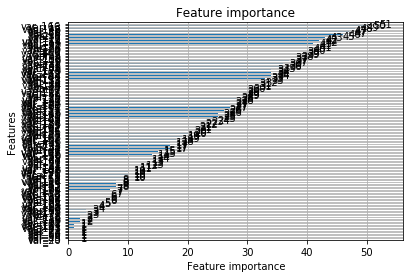

In [53]:
lgb.plot_importance(gbm1)

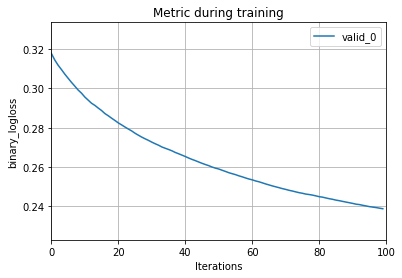

In [58]:
lgb.plot_metric(gbm1)

In [78]:
gbm.get_leaf_output

In [61]:
gbm.num_trees()

400

In [75]:
gbm.num_feature()

200

In [25]:
gbm.num_model_per_iteration()

1

In [65]:
t =np.zeros((400,31))

In [66]:
t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
for i in range(400):
    for j in range(31):
        t[i,j]= gbm.get_leaf_output(i,j)

In [68]:
t

array([[-2.05179515e+00, -2.10667179e+00, -2.08425860e+00, ...,
        -1.94436186e+00, -2.19764553e+00, -2.12764228e+00],
       [ 1.15517911e-01,  7.10602657e-02,  3.56763117e-02, ...,
         9.83815314e-02,  1.34156152e-01, -4.97577560e-03],
       [ 1.18303248e-01,  1.09121697e-01,  9.75413961e-02, ...,
         9.47246610e-03,  1.06421215e-01,  1.02335544e-02],
       ...,
       [ 7.80532189e-03,  8.74983149e-03,  2.71587459e-02, ...,
        -2.29459952e-02, -1.93554431e-03, -1.77763106e-02],
       [ 4.17443471e-02,  1.28236155e-02,  3.34958422e-02, ...,
        -1.32221446e-02,  8.42987492e-02,  8.07607748e-02],
       [ 6.45623996e-02,  1.17515184e-02,  2.00447600e-01, ...,
         2.32150956e-02,  2.11456842e-02, -1.29185194e-02]])

In [69]:
t[1]

array([ 0.11551791,  0.07106027,  0.03567631,  0.07527584,  0.03352114,
        0.00474334,  0.1331474 ,  0.08043395,  0.12870539,  0.02085897,
        0.01451219,  0.06046341,  0.0393723 ,  0.0159696 ,  0.04264224,
        0.02602567,  0.00968408,  0.01374235,  0.04669207, -0.00041834,
       -0.03077933,  0.04437303,  0.1399705 , -0.00939026, -0.00700609,
        0.06152207,  0.39444842,  0.05219112,  0.09838153,  0.13415615,
       -0.00497578])

In [82]:
gbm1.booster_.get_leaf_output(1,1)

0.11239557550229509